In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## [A] Preliminary analysis:
#### Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc. 
Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy


In [2]:
df=pd.read_excel('data.xlsx')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [3]:
df.shape

(303, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().any()

False

In [8]:
df.shape

(302, 14)

1 duplicate row removed

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

In [11]:
import hvplot.pandas

df.target.value_counts().hvplot.bar(
    title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count', 
    width=500, height=350
)

:Bars   [index]   (target)

Notes: <br>
We have 165 person with heart disease and 138 person without heart disease, so the classification problem is balanced. <br>
The perfect df!!! No null values 

## [B] Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

#### 1. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data 


In [12]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

#### 2. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [13]:
# Picking features based on values which are less than 10
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
categorical_val.remove('target')
# Method-2
# categorical_features = df.loc[:, (df < 10).any()].columns.to_list()

categorial_features=['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal']

In [14]:
df[categorical_val].nunique()

sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
ca         5
thal       4
dtype: int64

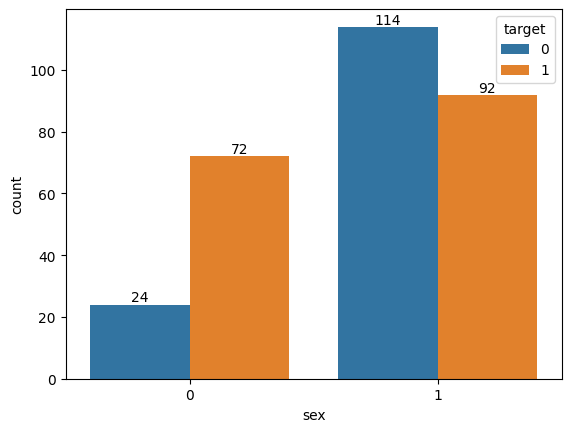

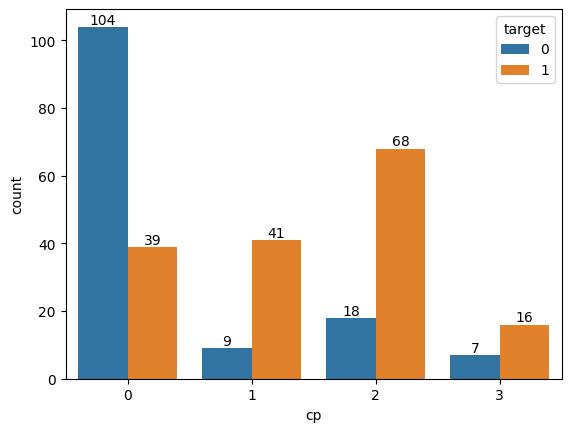

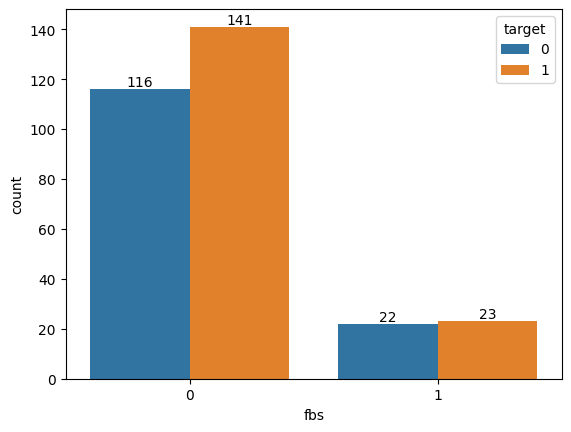

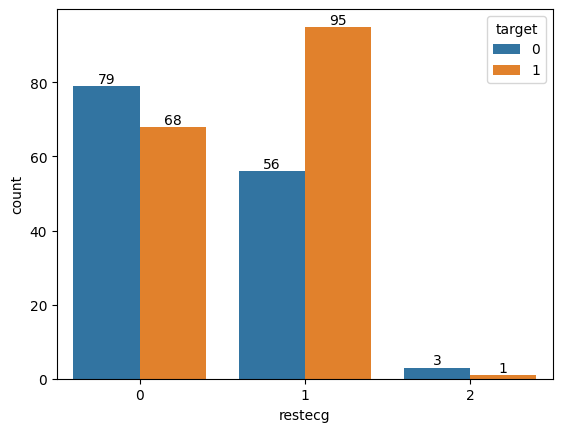

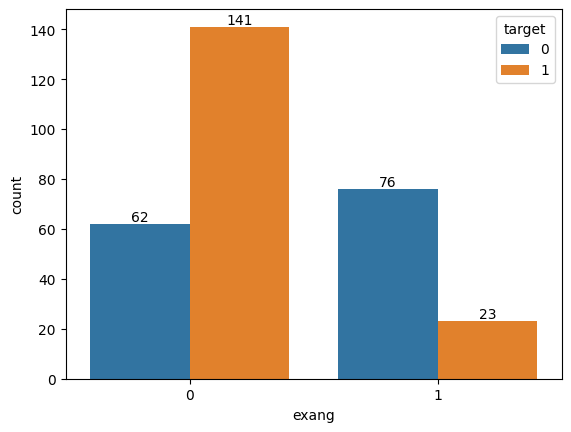

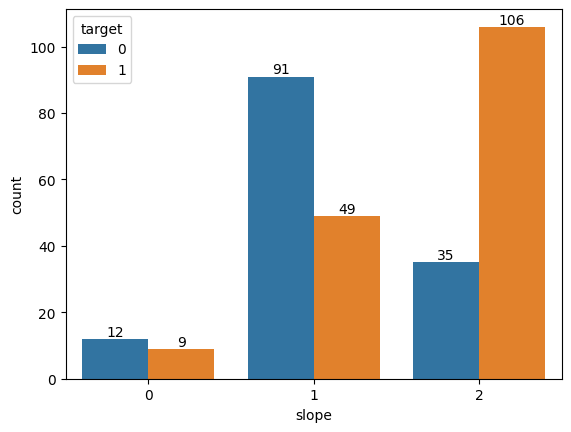

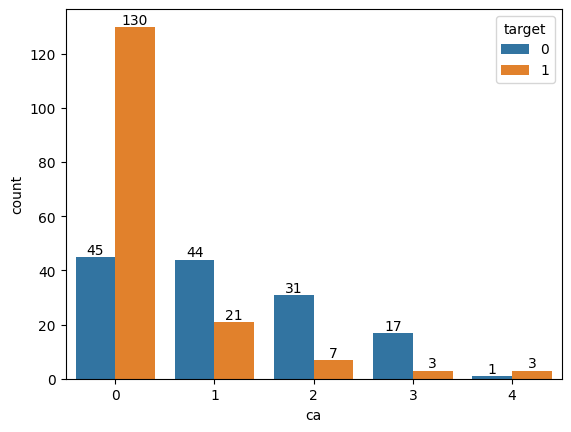

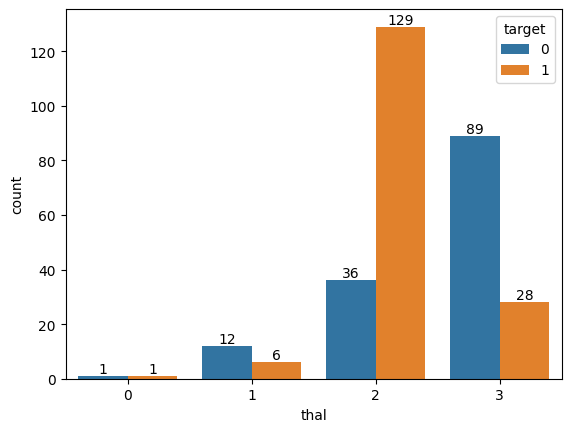

In [15]:
for i in categorical_val:
    ax=sns.countplot(x = i, data = df, hue='target')
    #ax.set_title(i)
    #ax.margins(y=0.1) # make room for the labels
    for bars in ax.containers:
        ax.bar_label(bars)#, fmt='%.1f')
    plt.show()

Notes:
1. cp {Chest Pain} : People with cp equal to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.
2. restecg {resting electrocardiographic results} : People with value 0 & 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.
3. exang {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)
4. slope {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
5. ca {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.
6. thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

In [16]:
# Creating a new dataframe with cvd: False & cvd: True
cvd_false = df[df.target == 0].reset_index()  #Here The index starts with 164 value So reset the index starting from 0
cvd_true = df[df.target == 1]

#### 3. Study the occurrence of CVD across the Age category 

Text(0.5, 0, 'Age')

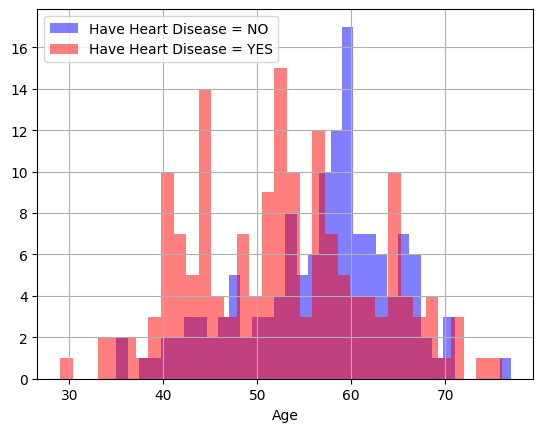

In [17]:
cvd_false['age'].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.5)
#df[df["target"] == 0]['age'].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.5)
cvd_true['age'].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.5)
plt.legend()
plt.xlabel('Age')

In [18]:
# bin ages into categories
df.loc[(df['age'] < 40), 'age_range'] = 30
df.loc[(df['age'] >= 40) & (df['age'] < 50), 'age_range'] = 40
df.loc[(df['age'] >= 50) & (df['age'] < 60), 'age_range'] = 50
df.loc[(df['age'] >= 60) & (df['age'] < 70), 'age_range'] = 60

In [19]:
df.age_range.value_counts(normalize= True)

50.0    0.428082
60.0    0.273973
40.0    0.246575
30.0    0.051370
Name: age_range, dtype: float64

Text(0, 0.5, 'Patients')

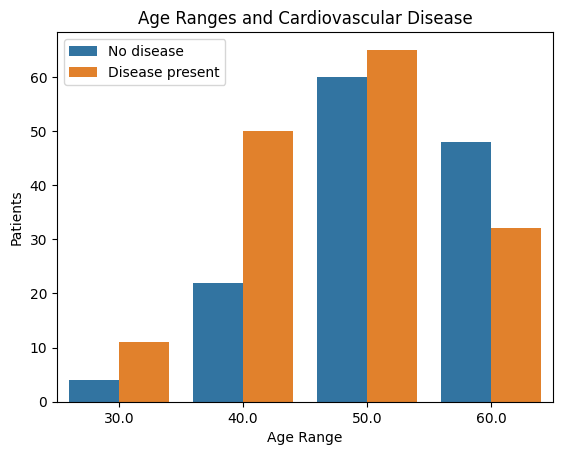

In [20]:
sns.countplot(x= 'age_range', hue= 'target', data= df)
plt.title('Age Ranges and Cardiovascular Disease')
plt.xlabel('Age Range')
plt.legend( ['No disease', 'Disease present'])
plt.ylabel('Patients')

In [21]:
df.drop('age_range',axis=1,inplace=True)

#### 4. Study the composition of all patients with respect to the Sex category 

In [22]:
df.sex.value_counts(normalize= True)

1    0.682119
0    0.317881
Name: sex, dtype: float64

Text(0, 0.5, 'Patients')

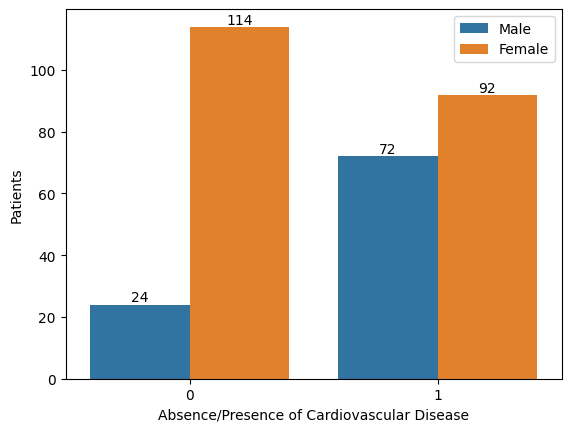

In [23]:
legend_labels = ['Male', 'Female']
ax=sns.countplot(x= 'target', hue= 'sex', data= df) #, palette= 'cubehelix')
for bars in ax.containers:
        ax.bar_label(bars) #, fmt='%.1f')
plt.xlabel('Absence/Presence of Cardiovascular Disease')
plt.legend(legend_labels)
plt.ylabel('Patients')

#### 5. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

Text(0.5, 1.0, 'CVD: FALSE')

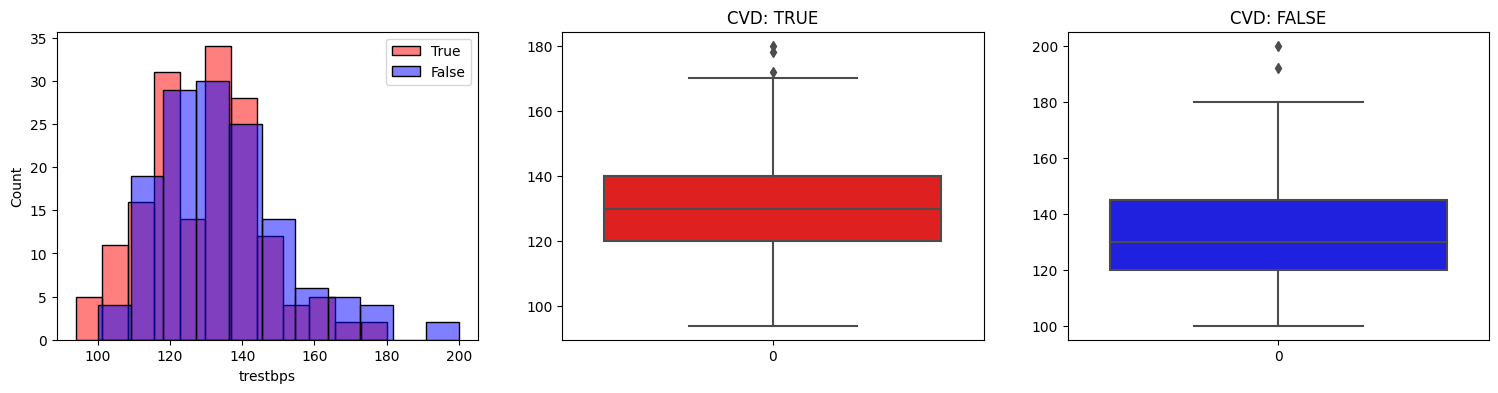

In [24]:
plt.figure(figsize=(25,4))

# PLOTTING SUBPLOT_1
plt.subplot(1,4,1)
sns.histplot(cvd_true.trestbps,color='red',alpha=0.5, label='True')
sns.histplot(cvd_false.trestbps,color='blue',alpha=0.5,label='False')
plt.legend()

# PLOTTING SUBPLOT_2
plt.subplot(1,4,2)
sns.boxplot(cvd_true.trestbps,color='red')
plt.title("CVD: TRUE")

# PLOTTING SUBPLOT_3
plt.subplot(1,4,3)
sns.boxplot(cvd_false.trestbps,color='blue')
plt.title("CVD: FALSE")

#### 6. Describe the relationship between cholesterol levels and a target variable

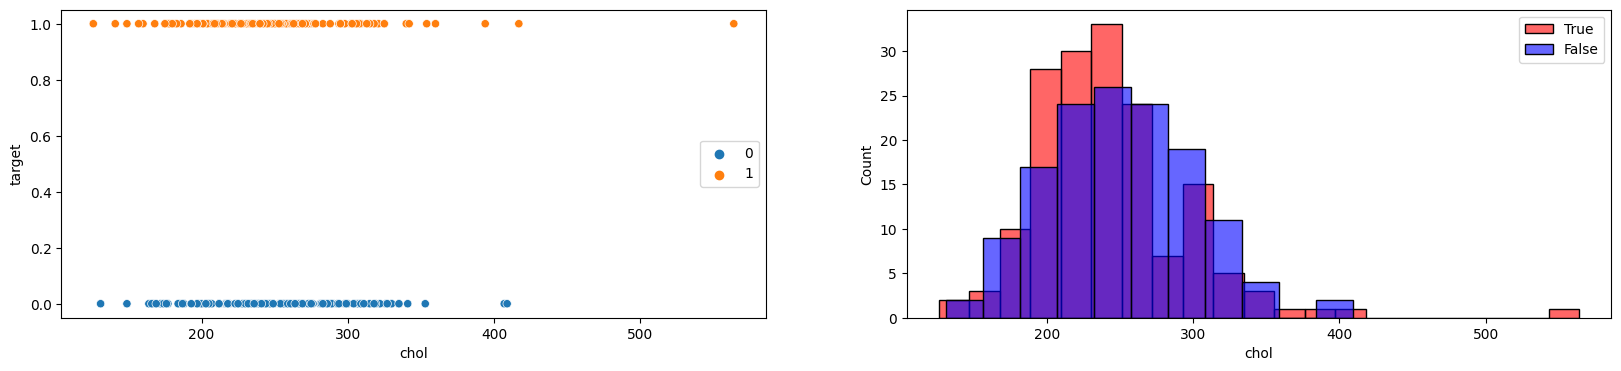

In [25]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.scatterplot(x=df.chol, y=df.target, hue=df.target)
plt.legend(loc='center right')

plt.subplot(122)
sns.histplot(cvd_true.chol, color='red',alpha=0.6,label='True')
sns.histplot(cvd_false.chol, color='blue',alpha=0.6,label='False')
plt.legend()

The people who develop CVD have much higher level of cholestrol sometimes and most are concentrated in the range of 200 - 300

#### 7. State what relationship exists between peak exercising and the occurrence of a heart attack

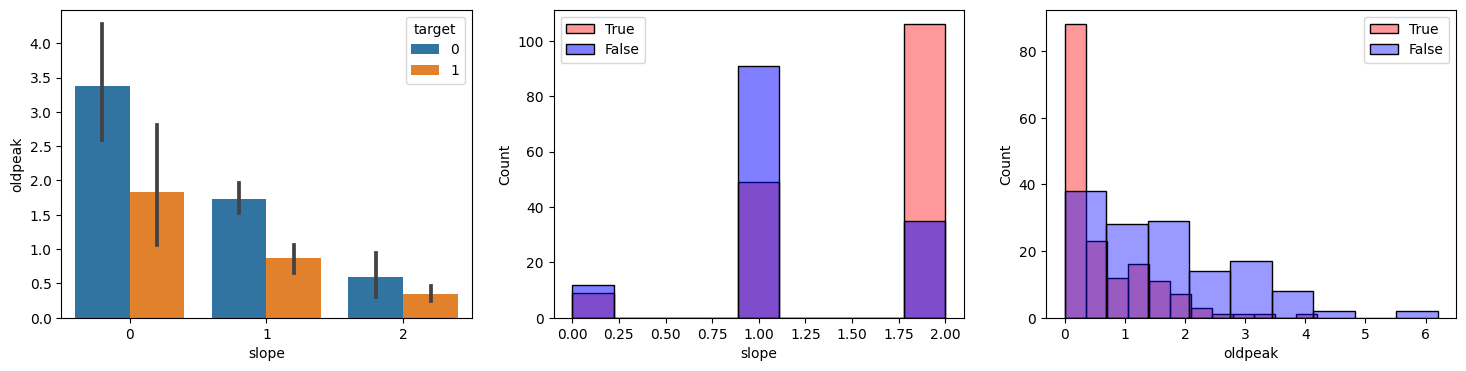

In [26]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.barplot(y=df.oldpeak, x=df.slope, hue=df.target)

plt.subplot(1,3,2)
sns.histplot(cvd_true.slope,color='red',alpha=0.4,label='True')
sns.histplot(cvd_false.slope,color='blue',alpha=0.5,label='False')
plt.legend()

plt.subplot(1,3,3)
sns.histplot(cvd_true.oldpeak,color='red',alpha=0.4,label='True')
sns.histplot(cvd_false.oldpeak,color='blue',alpha=0.4,label='False')
plt.legend()

oldpeak is lower in people who developed CVD, slope: 2 was highest

8. Check if thalassemia is a major cause of CVD

<Axes: xlabel='thal', ylabel='count'>

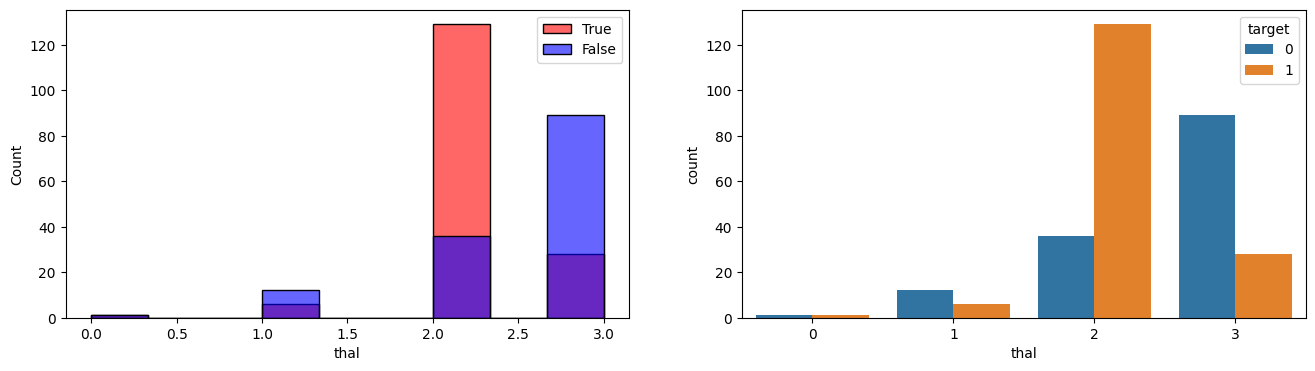

In [27]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.histplot(cvd_true.thal,color='red',alpha=0.6,label='True')
sns.histplot(cvd_false.thal,color='blue',alpha=0.6,label='False')
plt.legend()

plt.subplot(1,2,2)
sns.countplot(x=df.thal,data=df,hue=df.target)

Thalassemia can be a major cause in CVD as it is seen in more number in 2

#### 9. List how the other factors determine the occurrence of CVD 


<Axes: >

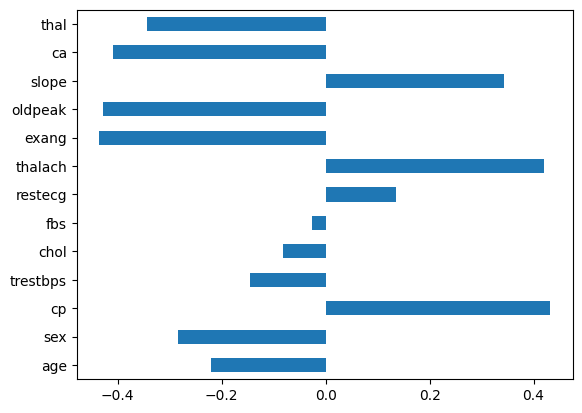

In [28]:
# Correlation between Heart Disease and Numeric Features
df.drop('target', axis=1).corrwith(df.target).plot(kind='barh')

#ylabel='Correlation'
#xlabel='Numerical Features',



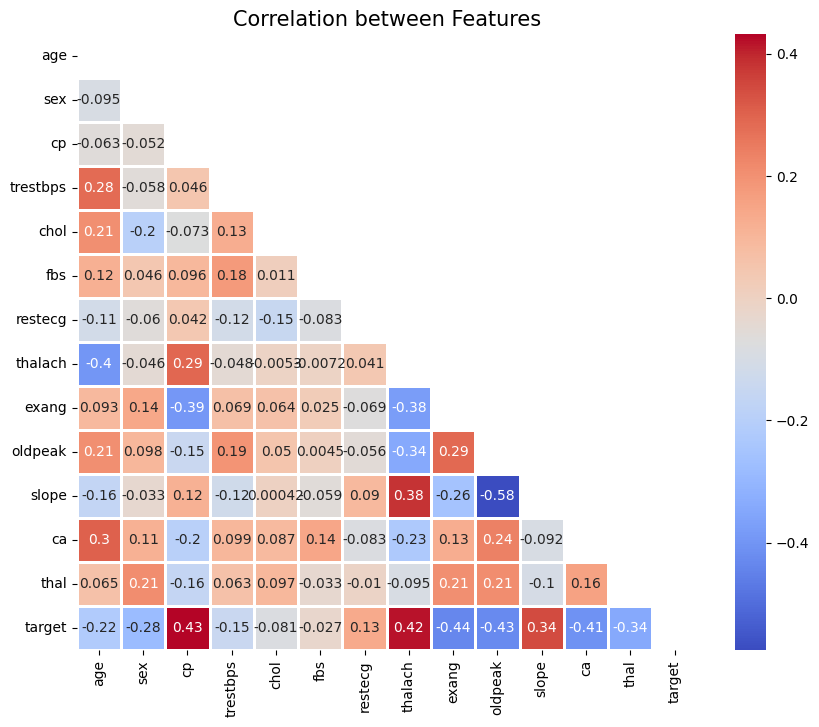

In [29]:
corr = df.corr()
plt.figure(figsize= (10,8))
mask = np.triu(np.ones_like(corr))
sns.heatmap(df.corr(), cmap= 'coolwarm', mask= mask, linewidths= 1, annot= True)
plt.title('Correlation between Features', fontsize= 15)
plt.show()

- fbs and chol are the lowest correlated with the target variable.
- All other variables have a significant correlation with the target variable.

#### 10. Use a pair plot to understand the relationship between all the given variables 

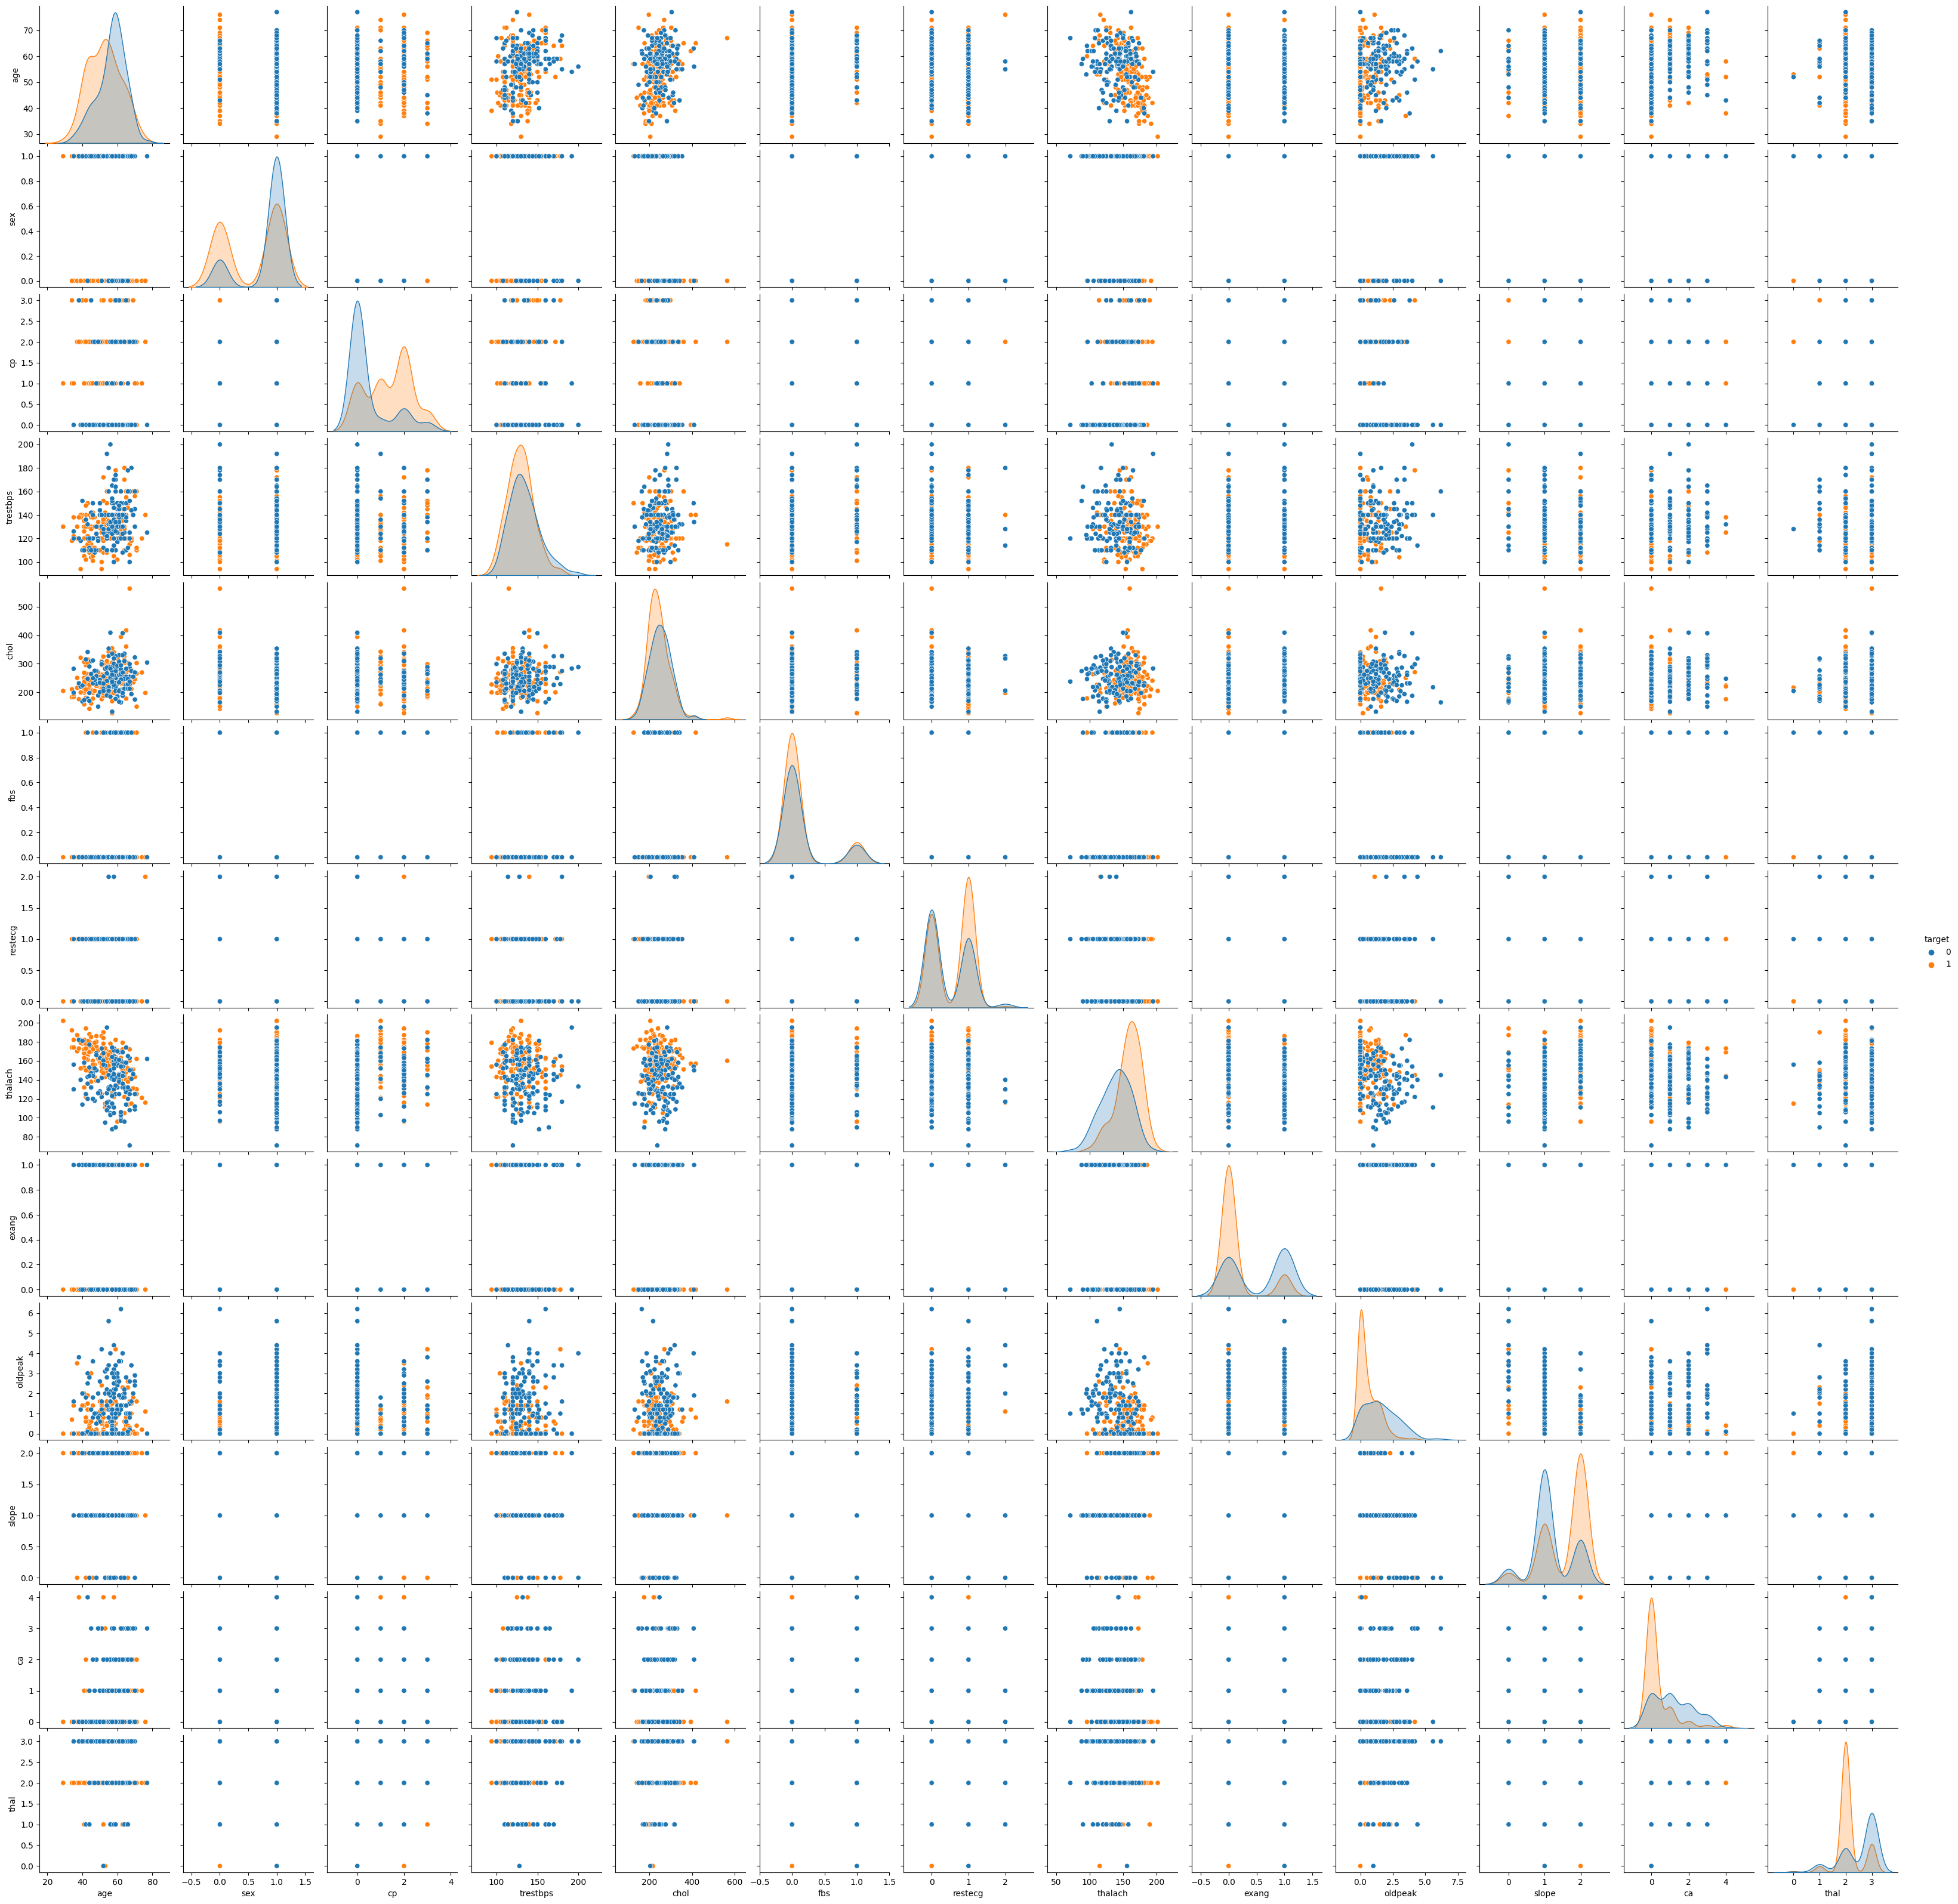

In [30]:
sns.pairplot(data=df,hue='target')

## [3] Build a baseline model to predict the risk of a heart attack 
using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [32]:
y = df.pop('target')
X = df

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 4)

print('X_train:',X_train.shape)
print('X_test :',X_test.shape)
print('y_train:',y_train.shape)
print('y_test :',y_test.shape)

X_train: (211, 13)
X_test : (91, 13)
y_train: (211,)
y_test : (91,)


In [34]:
import statsmodels.api as sm
logreg = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.349166
         Iterations 7


In [35]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  211
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                           12
Date:                Fri, 04 Aug 2023   Pseudo R-squ.:                  0.4953
Time:                        11:49:01   Log-Likelihood:                -73.674
converged:                       True   LL-Null:                       -145.97
Covariance Type:            nonrobust   LLR p-value:                 7.087e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0359      0.025      1.443      0.149      -0.013       0.085
sex           -1.6155      0.527     -3.067      0.002      -2.648      -0.583
cp             0.7427      0.226      3.293      0.0

sex, cp, 
thalach, exang, 
ca, thal, 
chol, age will be the features we will pick

In [36]:
logreg_pred = logreg.predict(X_test)
preds = list(map(round, logreg_pred))

Accuracy score 0.8021978021978022
Recall score 0.8867924528301887
Precision score 0.7966101694915254
f1 score 0.8392857142857143


<Axes: >

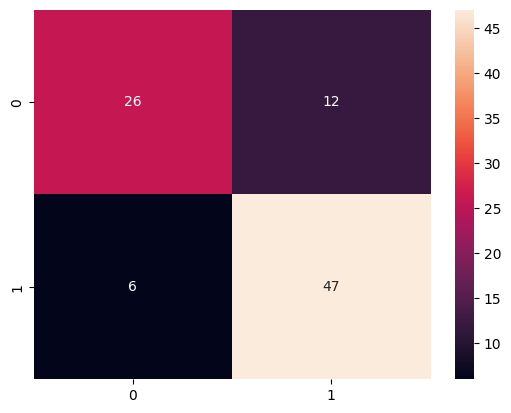

In [37]:
print('Accuracy score',accuracy_score(y_test, preds))
print('Recall score',recall_score(y_test, preds))
print('Precision score',precision_score(y_test, preds))
print('f1 score',f1_score(y_test, preds))
cm = confusion_matrix(y_test,preds)
sns.heatmap(cm,annot=True)

In [38]:
new_features = ['sex','cp','thalach','exang','ca','thal','chol']
new_X = df[new_features]
new_X.head()

sex  cp  thalach  exang  ca  thal  chol
0    1   3      150      0   0     1   233
1    1   2      187      0   0     2   250
2    0   1      172      0   0     2   204
3    1   1      178      0   0     2   236
4    0   0      163      1   0     2   354

In [39]:
X1_train, X1_test, y1_train, y1_test = train_test_split(new_X, y, test_size = 0.3, random_state=5)

print('X1_train:',X1_train.shape)
print('X1_test :',X1_test.shape)
print('y1_train:',y1_train.shape)
print('y1_test :',y1_test.shape)

X1_train: (211, 7)
X1_test : (91, 7)
y1_train: (211,)
y1_test : (91,)


In [40]:
logreg1 = sm.Logit(y1_train, X1_train).fit()

Optimization terminated successfully.
         Current function value: 0.374504
         Iterations 7


In [41]:
print(logreg1.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  211
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                            6
Date:                Fri, 04 Aug 2023   Pseudo R-squ.:                  0.4558
Time:                        11:49:02   Log-Likelihood:                -79.020
converged:                       True   LL-Null:                       -145.21
Covariance Type:            nonrobust   LLR p-value:                 4.065e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.7074      0.519     -3.291      0.001      -2.724      -0.690
cp             0.7575      0.203      3.733      0.000       0.360       1.155
thalach        0.0349      0.008      4.515      0.0

In [42]:
logreg1_pred = logreg1.predict(X1_test)
preds1 = list(map(round, logreg1_pred))

Accuracy score 0.8131868131868132
Recall score 0.875
Precision score 0.7924528301886793
f1 score 0.8316831683168316


<Axes: >

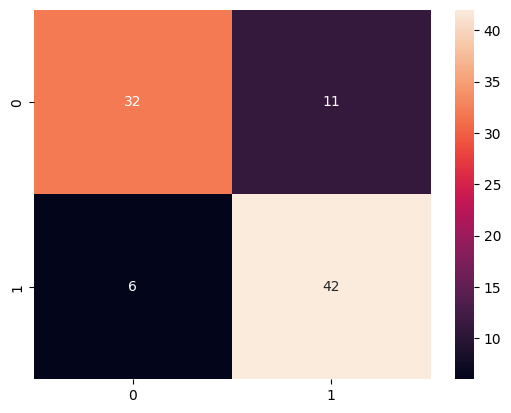

In [43]:
print('Accuracy score',accuracy_score(y1_test, preds1))
print('Recall score',recall_score(y1_test, preds1))
print('Precision score',precision_score(y1_test, preds1))
print('f1 score',f1_score(y1_test, preds1))
cm = confusion_matrix(y1_test,preds1)
sns.heatmap(cm,annot=True)

##### Random Forests with original data

In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=5,)
cv_score = cross_val_score(rfc, X, y, cv=5)
print(cv_score)
print('\nAverage score: ',cv_score.mean())

[0.83606557 0.8852459  0.83333333 0.78333333 0.75      ]

Average score:  0.8175956284153006


##### Random Forests with selected data

In [45]:
rfc1 = RandomForestClassifier(random_state=6)
cv_score1 = cross_val_score(rfc1, new_X, y, cv=5)
print(cv_score1)
print('\nAverage score: ',cv_score1.mean())

[0.81967213 0.91803279 0.81666667 0.81666667 0.75      ]

Average score:  0.8242076502732241
